# Public 311 Cases Analysis and Modeling 

### 0. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Disable Warning
import warnings
warnings.filterwarnings("ignore")

### 1. Importing & Editing Data 

Before deciding on what question to tackle, I first imported the data and performed some basic exploratory analysis. There are **two main goals** I want to accomplish in this part: 
1. Understand What Each Fields Represent 
2. Identify Data That are **Missing** and Decide on the Columns to Conduct Further Analysis on

In [3]:
cases = pd.read_csv('311_Cases.csv')

Let's see the size of the table.

In [4]:
print("The table has " + str(cases.shape[0]) + " rows and " + str(cases.shape[1]) + " columns.")

The table has 3121224 rows and 19 columns.


Let's first take a look at the columns the table has and their data types respectively.

In [5]:
cases.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Police District',
       'Latitude', 'Longitude', 'Point', 'Source', 'Media URL'],
      dtype='object')

In [6]:
list(zip(cases.columns,[cases[column].dtype for column in cases]))

[('CaseID', dtype('int64')),
 ('Opened', dtype('O')),
 ('Closed', dtype('O')),
 ('Updated', dtype('O')),
 ('Status', dtype('O')),
 ('Status Notes', dtype('O')),
 ('Responsible Agency', dtype('O')),
 ('Category', dtype('O')),
 ('Request Type', dtype('O')),
 ('Request Details', dtype('O')),
 ('Address', dtype('O')),
 ('Supervisor District', dtype('float64')),
 ('Neighborhood', dtype('O')),
 ('Police District', dtype('O')),
 ('Latitude', dtype('float64')),
 ('Longitude', dtype('float64')),
 ('Point', dtype('O')),
 ('Source', dtype('O')),
 ('Media URL', dtype('O'))]

Based on what we can see above and the official data webpage, there are 4 fields that use **numerical** values for this data. **caseID** is the primary key for identifying each individual case, **Supervisor District** uses the district numbering system from April 2012, **Latitude** and **Longtitude** represent for the geographical location of the request.

Let's now take a closer look at the first few rows of the data.

In [7]:
cases.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,241459,07/02/2008 03:16:55 PM,07/12/2010 10:16:59 AM,07/12/2010 10:16:59 AM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Damaging_Property,Lifted_sidewalk_tree_roots,Intersection of RETIRO WAY and RICO WAY,2.0,Marina,NORTHERN,37.80493,-122.4381,"(37.8049295544814, -122.438141782293)",Phone,NaN
1,241538,07/02/2008 04:47:08 PM,06/25/2010 11:16:56 AM,06/25/2010 11:16:56 AM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Damaged_Tree,Hanging_limb,Intersection of ELLIS ST and WEBSTER ST,5.0,Western Addition,NORTHERN,37.78257,-122.4308,"(37.7825698284387, -122.430797788991)",Phone,NaN
2,241571,07/02/2008 05:54:07 PM,10/21/2010 12:09:32 PM,10/21/2010 12:09:32 PM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,Blocking_street_lights,"4228 GEARY BLVD, SAN FRANCISCO, CA, 94118",1.0,Inner Richmond,RICHMOND,37.78120,-122.4650,"(37.7812, -122.465)",Phone,NaN
3,241909,07/03/2008 12:38:04 PM,06/25/2010 11:16:56 AM,06/25/2010 11:16:56 AM,Closed,NaN,DPW Ops Queue,Tree Maintenance,Trees - Landscaping,Sprinkler_system_issues,Intersection of 29TH ST and DOLORES ST,8.0,Noe Valley,INGLESIDE,37.74384,-122.4244,"(37.743838109851, -122.424384904295)",Phone,NaN
4,241917,07/03/2008 12:44:26 PM,07/06/2010 06:16:58 PM,07/06/2010 06:16:58 PM,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of BRANNAN ST and DELANCEY ST,6.0,South Beach,SOUTHERN,37.78361,-122.3898,"(37.7836091422541, -122.389846394555)",Phone,NaN


Immediately, I can see there are **missing values** in this table.

In [8]:
cases.isna().any()

CaseID                 False
Opened                 False
Closed                  True
Updated                False
Status                 False
Status Notes            True
Responsible Agency     False
Category               False
Request Type           False
Request Details         True
Address                 True
Supervisor District     True
Neighborhood            True
Police District         True
Latitude               False
Longitude              False
Point                   True
Source                 False
Media URL               True
dtype: bool

As I can see, a lot of the columns here have missing values. This can happen primarily due to the following 2 reasons:
1. The data were lost somehow during the downloading/importing process due to the large size of the file
2. The data weren't complete initially 

In order to determine which one of the two above each column falls into, let's take a closer look at the number of missing values per column.

In [9]:
cases.isnull().sum()

CaseID                       0
Opened                       0
Closed                  109162
Updated                      0
Status                       0
Status Notes            866467
Responsible Agency           0
Category                     0
Request Type                 0
Request Details          47011
Address                     15
Supervisor District     354408
Neighborhood            428739
Police District         351868
Latitude                     0
Longitude                    0
Point                   354344
Source                       0
Media URL              2415234
dtype: int64

To remind myself, the total number of rows in this table is 3121224. While the Media URL column has a relatively large number of missing values, the numbers of null values for all the columns **don't seem like they come from an import/download loss.**

Because I have 19 columns (which is way too many) to work with, in order to focus the efforts, I will read through the descriptions of each column to decide which column to drop from my table. In addition, the number of missing values will also be a factor in my decision. From the official webpage:

1. **CaseID**: The unique ID of the service request created
2. **Opened**: The date and time when the service request was made
3. **Closed**: The date and time when the service request was closed
4. **Updated**: The date and time when the service request was last modified. For requests with `status=closed`, this will be the date the request was closed
5. **Status**: A single-word indicator of the current state of the service request
6. **Status Notes**: Explanation of why status was changed to current state or more details on current status than conveyed with status alone
7. **Responsible Agency**: The agency responsible for fulfilling or otherwise addressing the service request
8. **Category**: The human readable name of the service request type
9. **Request Type**: The human readable name of the service request subtype
10. **Request Details**: The human readable name of the service request details
11. **Address**: Human readable address or description of location
12. **Supervisor District**: San Francisco Supervisor District as defined in 'Supervisor Districts as of April 2012'
13. **Neighborhood**: San Francisco Neighborhood as defined in 'SF Find Neighborhoods'
14. **Police District**: San Francisco Police District as defined in 'Current Police Districts'
15. **Latitude**: Latitude of the location, using the WGS84 projection
16. **Longitude**: Longitude of the location, using the WGS84 projection
17. **Point**: Combination of Latitude and Longitude for Socrata native maps
18. **Source**: Mechanism or path by which the service request was received; typically ‘Phone’, ‘Text/SMS’, ‘Website’, ‘Mobile App’, ‘Twitter’, etc but terms may vary by system.
19. **Meida URL**: A URL to media associated with the request, e.g. an image.


Now, seeing that a lot of the requests are not closed and all the latitude and longitude data are present. It may be interesting to see if I can:

### **Predict the status of the requests based on other characteristics of the requests (such as category, location, etc.)** 
 
 In adidition, the columns **Responsible Agency**, **Supervisor District**, **Police District**, and **Neighborhood** can provide further insights into why/why not such a correlation might exist.

### 2. Exploratory Data Analysis 

Having decided on what to explore and potentially applying an ML model to, in this stage of the analysis, I will be conducting some preliminary EDAs on the correlation between the status of the requests and some key characteristics of the requests. This will help me gain some insights into how the number of open/closed cases are distributed based on these categories and if there are any key pattern (trend) in the data. 

Due to the similarity and limitations across some of the fields, I decided to focus on the following three characteristics:

1. **Request Category (What kind of requests)**
2. **Request Source (How were the requests made)**
3. **Latitude/Longitude (Where were the requests)**

Before the analysis, I will drop the Media URL column because it is not as related to the problem I want to explore and there are also too many null values for the column to be effective in the analysis.

In [10]:
cases.drop(['Media URL'], axis = 1, inplace = True)

Before moving forward, I will try to quantify the the variables I am trying to explore the correlation on. 

* **Requests**: Closed or Open 
* **Location**: Latitude and Longtitude of the Request

Let's take a look at the **Status** column.

In [11]:
statuses = cases['Status'].value_counts()
statuses

Closed    3012062
Open       109162
Name: Status, dtype: int64

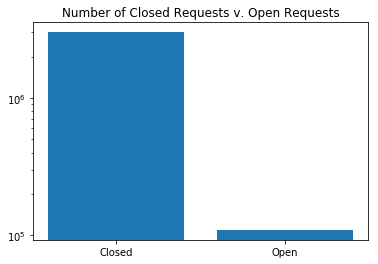

In [12]:
plt.bar(statuses.index, statuses.values, log = True)
plt.title('Number of Closed Requests v. Open Requests');

In [13]:
print('As we can see, about '+str(round(statuses.values[1]/sum(statuses.values)*100,3))+' % of the cases are open.')

As we can see, about 3.497 % of the cases are open.


#### A. Status of Requests and Request Category

First, I decide to see if there is any correlation between the number of unclosed requests and the category of the requests. To start, I will explore the distribution of all the different categories against the statuses of the categories. 

In [14]:
categories = list(cases['Category'].unique())
print('There are '+str(len(categories))+' unique categories for 311 cases table.')

There are 102 unique categories for 311 cases table.


Since there is a total of 102 unique categories, it will be very hard to plot out all of the categories. For the general visualization purposes, I will first sort the number of open cases in descending order, and then directly plot out the distribution. The corresponding categories will be kept track of in the following table 'categories'.

In [15]:
opened, closed = [], []
for category in categories:
    opened.append(cases[(cases['Category'] == category)&(cases['Status'] == 'Open')].shape[0])
    closed.append(cases[(cases['Category'] == category)&(cases['Status'] == 'Closed')].shape[0])

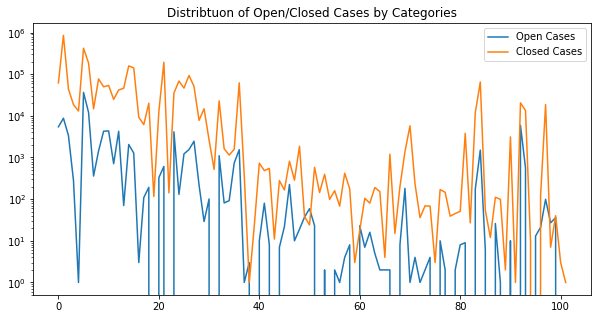

In [16]:
plt.figure(figsize = (10,5))
plt.plot(opened, label = 'Open Cases')
plt.plot(closed, label = 'Closed Cases')
plt.yscale('log');
plt.title('Distribtuon of Open/Closed Cases by Categories')
plt.legend();

As we can see in general, across all 102 categories, the pattern of closed cases roughly follows that of the open cases, which means that the statuses of the cases are somewhat related to the category (the number of open, closed cases per category align). Below is a full-scale more specific breakdown of Open/Closed cases by Categories.

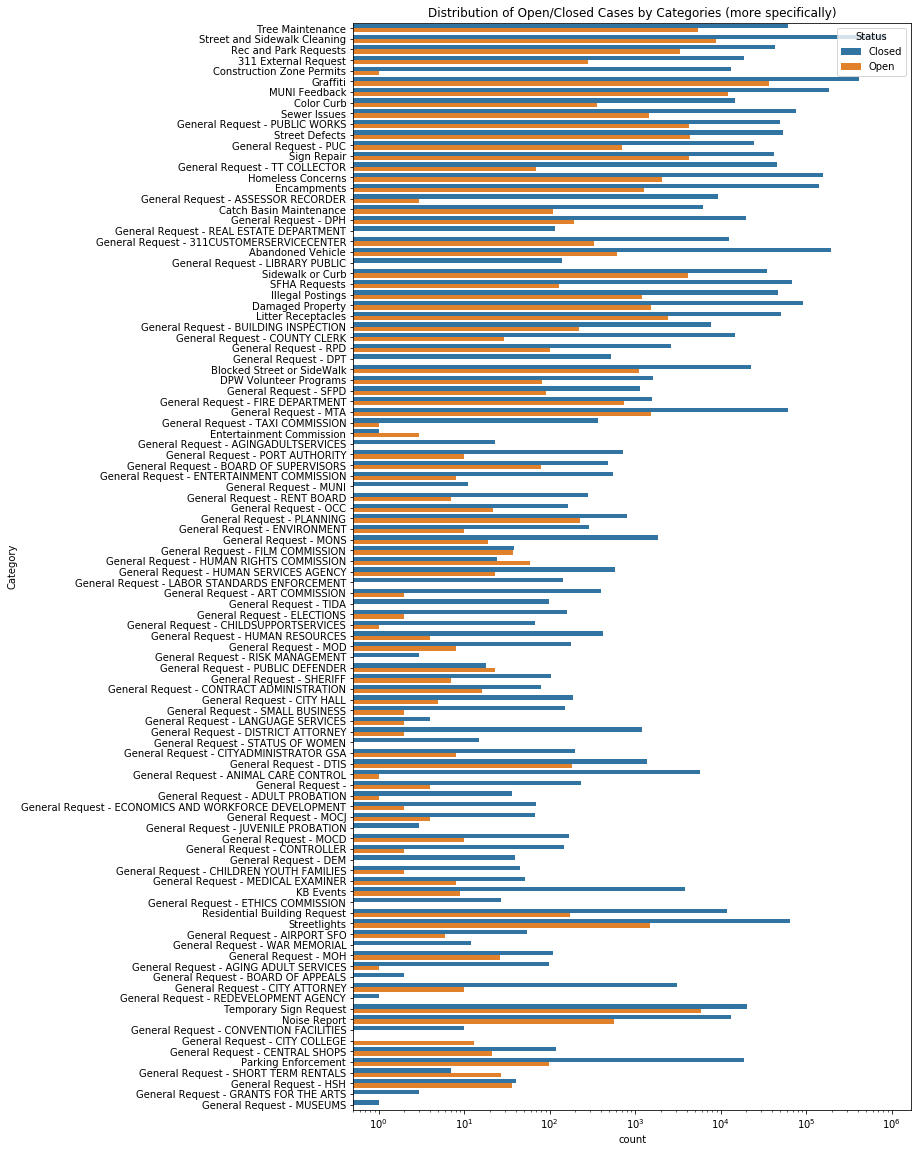

In [17]:
plt.figure(figsize = (10, 20))
sns.countplot(y = 'Category', hue = 'Status', data = cases)
plt.xscale('log')
plt.title('Distribution of Open/Closed Cases by Categories (more specifically)');

To gain more insights, let's take a look at the top 10 categories that have the highest number of closed cases. 

In [18]:
cases[cases['Status'] == 'Closed'].groupby('Category').count()[['Status']].sort_values('Status', ascending = False).head(10)

,Status
Category,
Street and Sidewalk Cleaning,856189
Graffiti,420017
Abandoned Vehicle,193651
MUNI Feedback,185644
Homeless Concerns,158336
Encampments,141246
Damaged Property,93085
Sewer Issues,77068
SFHA Requests,68504


Correspondingly, let's take a look at the top 10 categories that have the highest number of open cases.

In [19]:
cases[cases['Status'] == 'Open'].groupby('Category').count()[['Status']].sort_values('Status', ascending = False).head(10)

,Status
Category,
Graffiti,36540
MUNI Feedback,12134
Street and Sidewalk Cleaning,8764
Temporary Sign Request,5918
Tree Maintenance,5458
Street Defects,4345
General Request - PUBLIC WORKS,4275
Sign Repair,4261
Sidewalk or Curb,4124


As we can see above, service requests such as **Graffiti** and **Street Defects** are among the some that have the highest number of open requests. Such categories should be the focus of the city government to help improve the service efficiency.

Finally, since we have 102 categories, it may be a good idea to see if we can have an idea of more general categories to faciliate our comparison.

First, by simply observing the request category, we can see that the word **General Request** appears frequently for the category names. In order to avoid the interference of this generic head-title with our analysis, I will remove that first.

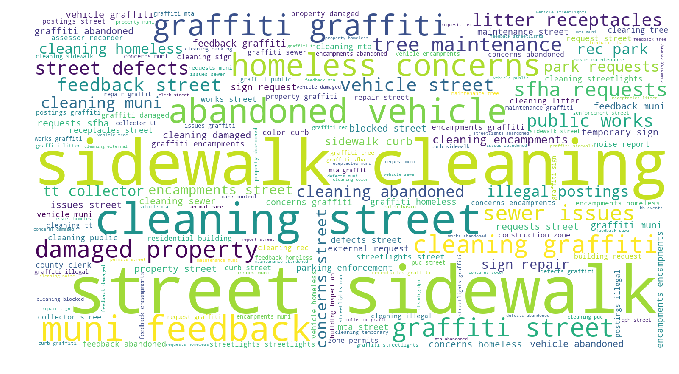

In [20]:
from wordcloud import WordCloud, STOPWORDS 
import re
stopwords = set(STOPWORDS)

#Convert all categories to lower cases for consistency
category_words = list(cases['Category'].str.lower().values)

#Replace all non-alphabetical letters with space to allow wordcloud to run properly
category_words = re.sub('[^a-zA-Z]', ' ', str(category_words))

#Remove all substrings 'general request' in the categories
category_words = re.sub('general request', '', str(category_words))

#Creating the wordcloud
wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(category_words)
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

As we can see, the most frequent requests stem from something related with one of **Sidewalk**, **Vehicle**, **Accomodation (for the homeless)**, and **Cleaning**.

#### B. Status of Requests and Request Source

Next, I will explore the connection between status of requests and the request source (how the request was made). Let's first take a look at the distribution of the request sources (1. total, 2. split by statuses).

In [21]:
cases['Source'].value_counts()

Phone                1624024
Mobile/Open311        865026
Web                   489160
Integrated Agency     107819
Twitter                28417
Other Department        5732
Email                   1033
Mail                      13
Name: Source, dtype: int64

I will first visualize the distribution of **total number of requests** by request sources.

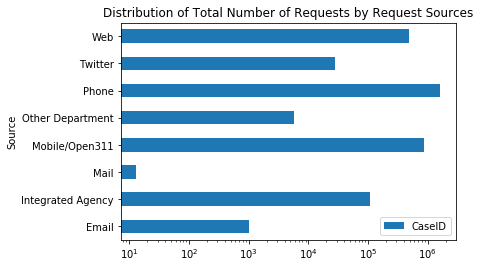

In [22]:
cases.groupby('Source').count()[['CaseID']].plot.barh()
plt.title('Distribution of Total Number of Requests by Request Sources')
plt.xscale('log');

To increase the *efficiency* of the requests, it is helpful to look at the proportion of the number of closed cases against the number of open cases. To gain more insights into **which request source is relatively efficient**, I will visualize the distribution of **number of open/closed requests** by request sources.

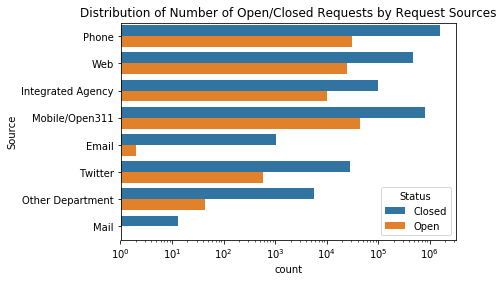

In [23]:
sns.countplot(y = 'Source', hue = 'Status', data = cases)
plt.title('Distribution of Number of Open/Closed Requests by Request Sources')
plt.xscale('log');

As shown above, I can immediately tell that **Mail** and **Email** are the two most efficient and effective in terms fo handling requests since **compared with the total number of cases, most are closed cases**. On the other, it is worth noting how **Web (Online Requests)**, **Integrated Agency**, and **Mobile/Open311** all have open proportions of unclosed requests. 

One way of explaining this situation is that **it is easier to directly make a phone call with the service agency to open a request, and this may cause an overload of requests (some of them may not actually require government handling).** 

It is also worth noting that **verbally explaining the situation on a phone may not be the clearest way to presenting the problem** (an additional barrier for the city government to request the correct services).

Let's try to see if there is a correlation between the **efficiency of the requests** and the number of requests made. To check this, I will visualize the proportion of closed requests and the total number of requests against the total number of requests.

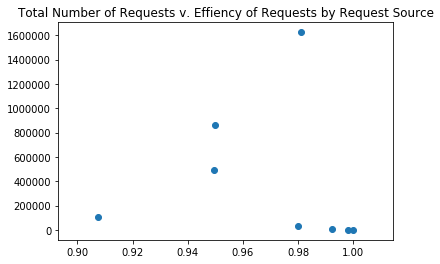

In [24]:
closed_requests_by_source = cases[cases['Status'] == 'Closed'].groupby('Source').count()['CaseID'].values
total_requests_by_source = cases.groupby('Source').count()['CaseID'].values
efficiency = closed_requests_by_source / total_requests_by_source 
plt.scatter(efficiency, total_requests_by_source)
plt.title('Total Number of Requests v. Effiency of Requests by Request Source');

In [25]:
np.corrcoef(efficiency, total_requests_by_source)

array([[ 1.       , -0.1141836],
       [-0.1141836,  1.       ]])

As we can see above, although there seems to be a negative correlation between the two. The correlation is too weak to be significant to our analysis results. Therefore, I conclude that the efficiency of the requests are not quite correlated to the number of the requests made.

One last thing before I move on to the geographical location of the requests, I will rank the requests by their effiency so it can possibly help us determine **the likelihood** of the stauts of the requests in later analysis based on the request source.

In [26]:
ranked_efficiency = pd.DataFrame({'Efficiency':efficiency})
ranked_efficiency.index = cases.groupby('Source').count()['CaseID'].index
ranked_efficiency.sort_values('Efficiency', ascending = False)

,Efficiency
Source,
Mail,1.000000
Email,0.998064
Other Department,0.992498
Phone,0.981163
Twitter,0.979906
Mobile/Open311,0.949870
Web,0.949673
Integrated Agency,0.907502


Again, we can see that **Mail and Email** are the most *efficient* ones, while **Integrated Agency** is the least efficient.

#### C. Status of Requests and Location of the Requests

Lastly, for this part of the exploratory data analysis, I will look for patterns and possibly correlation between the status of the requests and the location of the requests (in terms of latitude and longitude).

First, Let's look at the distribution of the location of the requests geographically.

In [27]:
cases[['Latitude','Longitude']].describe()

,Latitude,Longitude
count,3.121224e+06,3.121224e+06
mean,3.350047e+01,-1.086073e+02
std,1.195104e+01,3.874473e+01
min,0.000000e+00,-1.412191e+02
25%,3.773516e+01,-1.224380e+02
50%,3.776400e+01,-1.224190e+02
75%,3.778035e+01,-1.224054e+02
max,3.788160e+01,0.000000e+00


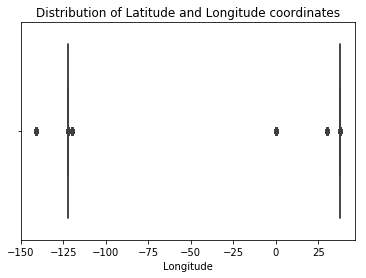

In [28]:
sns.boxplot(cases['Latitude'])
sns.boxplot(cases['Longitude'])
plt.title('Distribution of Latitude and Longitude coordinates');

As we can see from the data above, all the data are very close together, making plotting on a map more challenging since overplotting is much more likely.

Note: For the map plotting section, I will be using **Basemap**, an open-source map plotting library integrated with matplotlib. 

In addition, since the case requests should be based in San Francisco, and I can see from the table and boxplot above that there are outliers whose geographical coordinates are very far off the Northern Californian region. As a result, to focus the visualization on the SF region, I will filter out the outliers from the data set. The point of reference here is the coordinate of San Francisco.

In [29]:
sf_locations = cases[(cases['Latitude']>37)&(cases['Longitude']>-123)&(cases['Longitude']<-121)]
sf_coordinates = sf_locations[['Latitude','Longitude']]

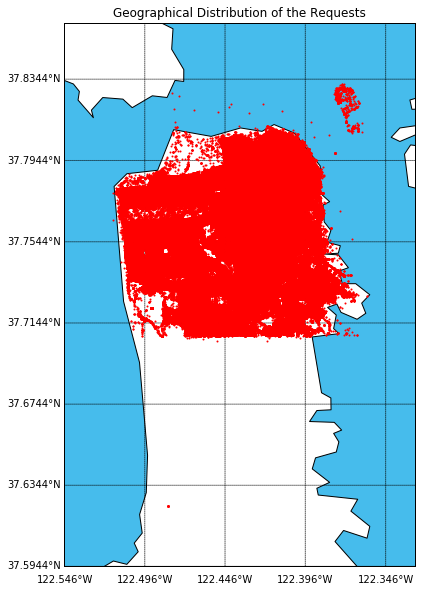

In [30]:
from mpl_toolkits.basemap import Basemap
lat = sf_coordinates['Latitude'].values
lon = sf_coordinates['Longitude'].values

# determine range to print based on min, max lat and lon of the data
margin = 0.03 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

plt.figure(figsize = (20,10))
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=1000000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
m.drawparallels(np.arange(lat_min,lat_max,0.04),labels=[1,0,0,0])
m.drawmeridians(np.arange(lon_min,lon_max,0.05),labels=[0,0,0,1])
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5, s = 1)

plt.title('Geographical Distribution of the Requests')
plt.show()

As shown above, overplotting is clearly an issue with so many number of requests all concentrated in San Francisco. One way I can reduce this is by **applying a (density) hexmap over the region to visualize the density**.

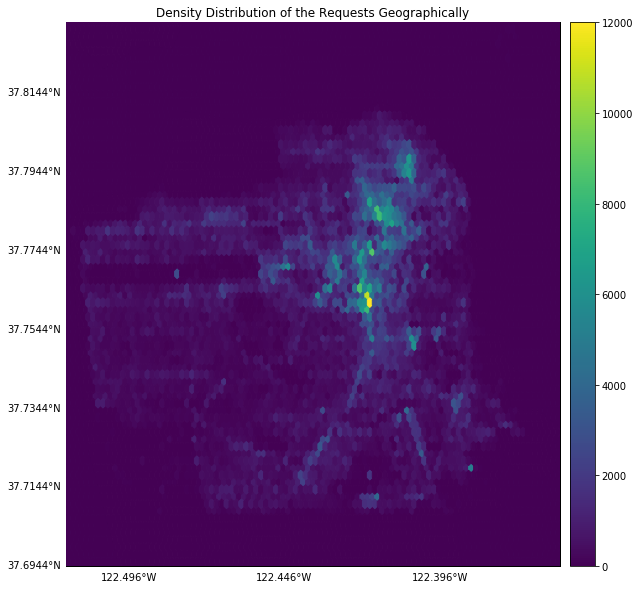

In [31]:
fig = plt.figure(figsize = (10,10))
# create map using BASEMAP
offset = 0.07
m = Basemap(llcrnrlon=min(lon),
            llcrnrlat=min(lat) + offset,
            urcrnrlon=max(lon),
            urcrnrlat=max(lat),
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=1000000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
m.drawparallels(np.arange(lat_min,lat_max,0.02),labels=[1,0,0,0])
m.drawmeridians(np.arange(lon_min,lon_max,0.05),labels=[0,0,0,1])
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
m.hexbin(lons, lats, zorder = 5)
m.colorbar(location = 'right')
plt.title('Density Distribution of the Requests Geographically')
plt.show()

As we can see in the density plot above, the requests are concentrated around the region with roughly the coordinate (37.758N and 122.418W). A quick lookup of the coordinate and the area around it, I found out that it is **the region around San Francisco City Hall, Southwest of Chinatown, and West of Powell Street** that has the most frequent requests.

Lastly, Since closed requests greatly outnumber open requests, I will look at the density distribution of the locations of the open (unclosed) requests broken down by their statuses.

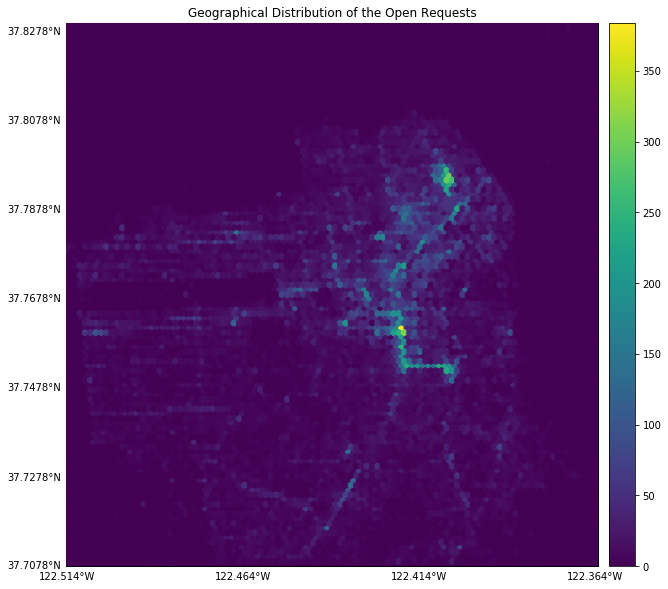

In [43]:
lat_open = sf_locations[sf_locations['Status'] == 'Open']['Latitude'].values
lon_open = sf_locations[sf_locations['Status'] == 'Open']['Longitude'].values

# (the range of plotting remains the same)
# determine range to print based on min, max lat and lon of the data
lat_min = min(lat_open) 
lat_max = max(lat_open) 
lon_min = min(lon_open) 
lon_max = max(lon_open) 


plt.figure(figsize = (20,10))
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=1000000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
m.drawparallels(np.arange(lat_min,lat_max,0.02),labels=[1,0,0,0])
m.drawmeridians(np.arange(lon_min,lon_max,0.05),labels=[0,0,0,1])
# convert lat and lon to map projection coordinates
lons_open, lats_open = m(lon_open, lat_open)

#Plot the Open Requests as Blue Dots
m.hexbin(lons_open, lats_open, zorder=5)
m.colorbar(location = 'right')
plt.title('Geographical Distribution of the Open Requests')
plt.show()

As shown above, the open requests are concentrated around primarily two regions, one around approximately 37.76N, 122.41W, while the other one aorund 37.792N, 122.39W. By looking up these two regions specifically, I can see that the unclosed requests mostly stem from **Mission District** and **SouthEast of Financial District (close to Embarcadero)**. 

### 3. Determining and Implementing the ML Model

As I have demonstrated above with the exploratory data analysis on three distinct features:

* Request Category
* Request Source
* Request Location

It is clear that due to the large volume of data and the numerous features the 311 cases table has, using a single feature may not be sufficient enough for a good ML model. Therefore, I decide to look at the results of different classifers for Request Category, Request Source, and Request Location.

To reiterate my objective, I want to **classify a case as closed or open given its request category (from the given ones), request source, and geographical location.**

#### A. Cleaning Data to Simplify Request Category

A major issue I've encountered in the EDA stage is that there are simply too many categories (many of which are similar, **as shown by the wordcloud**). To make my classifer more effective and avoid treatment of similar categories as something completely different, I will try to **aggregate these categories** into more general and enclosing types. 

I look through the categories and try to identify similar patterns.

First, to faciliate the process, I will remove the `General Request` prefixes for the categories.

In [32]:
cases['Category'] = cases['Category'].apply(lambda x: x.replace('General Request - ', ''))
cases['Category'] = cases['Category'].str.lower()

Next, I will base my classification on the top 5 (most frequent) categories.

In [33]:
cases['Category'].value_counts().iloc[:5]

street and sidewalk cleaning    864953
graffiti                        456557
muni feedback                   197778
abandoned vehicle               194261
homeless concerns               160387
Name: Category, dtype: int64

I will clean and restructure the `Category` column based on the following logic:

1. Classify the category into one of the main five if it contains certain keywords
2. Otherwise, classify the category into `Other` category


In [34]:
keywords_by_category = {
    'Street': ['street', 'sidewalk'],
    'Graffiti': ['graffiti'],
    'Feedback': ['feedback'],
    'Accomodation': ['homeless', 'housing'],
    'Traffic': ['vehicle', 'car', 'traffic', 'transportation']
}

def reaggregate_by_category(original):
    for key in keywords_by_category:
        for keyword in keywords_by_category[key]:
            if keyword in original:
                return key
    return 'Other'

cases['Reaggregated'] = cases['Category'].apply(lambda x: reaggregate_by_category(x))


Let's revisualize the frequency of open and closed requests by the new reaggregated categories.

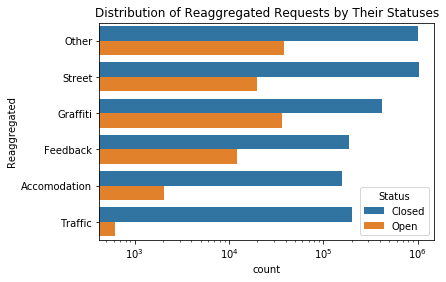

In [35]:
sns.countplot(y = 'Reaggregated', hue = 'Status', data = cases)
plt.xscale('log')
plt.title('Distribution of Reaggregated Requests by Their Statuses');

As shown above, the trend in the EDA section becomes even clearer now. As I can see that `Traffic` has the least open cases (dealt with most efficiently), while `Graffiti` and `Feedback` are generally not treated well enough.

#### B. Determining What ML Models to Use

1. For both the request categories (now **re-aggregated**) and the request source, since I am mapping multiple classes to a binary output. I decided to use the ensemble method **Random Forest Classifier** because it works well with binary classification and can stochastically boost the corresponding decision tree's performance. 

2. For the request location, since I am working with 2D coordinates. I decided to use an **KNN** model to help decide the decision boundary for classifying the requests by their statuses

#### B.1    Random Forest Classification - Request Category (Re-aggregated) & Request Source

Before proceeding with fitting the classifer, I will use **one-hot encoding** to transform both the categories and sources columns and concatenate the result together for training purposes.

In [36]:
#Reformatting the string categories using one-hot encoding
encoded_categories = pd.get_dummies(cases['Reaggregated'])
encoded_sources = pd.get_dummies(cases['Source'])

#Concatenating the Encoded Results
merge_encoded = pd.concat([encoded_categories, encoded_sources],axis = 1)

Next, I will fit the Random Forest Classifer on the Request Category and the Request Source.

In [42]:
import sklearn.ensemble as en
clf = en.RandomForestClassifier()

#Fitting the Model
clf.fit(merge_encoded, cases['Status'])

#Scoring the Training Accuracy
clf.score(merge_encoded, cases['Status'])

0.9650259000956035

#### B.2     KNN Classification - Request Location 

Before proceeding with fitting the classifer, I will re-analyze the distribution of the geographical locations (by using **displots**) and remove the outliers (those that aren't actually in San Francisco).

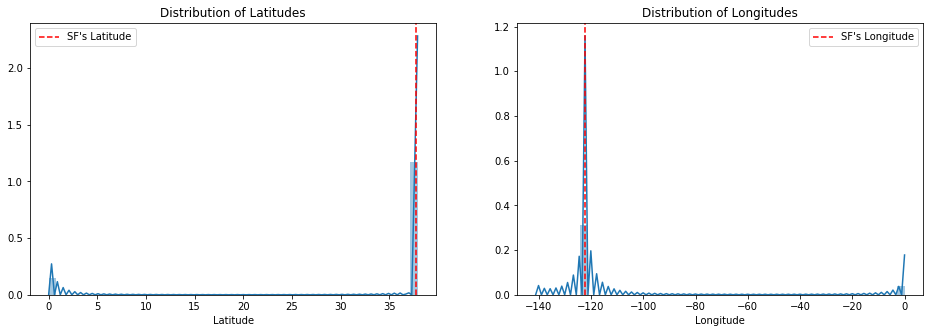

In [43]:
plotted = ['Latitude', 'Longitude']
SF = [37.7749, -122.4194]
plt.figure(figsize = (16, 5))
for i in range(1,3):
    plt.subplot(1, 2, i)
    sns.distplot(cases[plotted[i-1]])
    plt.axvline(x = SF[i-1], color = 'red', linestyle ='--', label = 'SF\'s '+plotted[i-1])
    plt.title('Distribution of '+plotted[i-1]+'s')
    plt.legend();

As shown above, we should eliminate those with latitudes less than 35 and longitudes less than -100 so that the region is centered around San Francisco.

In [44]:
#filter out the outliers
SF_cases = cases[(cases['Latitude']>=35)&(cases['Longitude']<-100)]

#Initiate a KNN classifer
import sklearn.neighbors as ne
knn_clf = ne.KNeighborsClassifier()

#Fitting the Model
knn_clf.fit(SF_cases[['Latitude', 'Longitude']], SF_cases['Status'])

#Scoring the Training Accuracy
knn_clf.score(SF_cases[['Latitude', 'Longitude']], SF_cases['Status'])

0.9657131795180545

#### B.3 Chaining the ML models

As shown above, both the Random Forest and KNN Classifer have a pretty good training accuracy on the data. 

* Random Forest Classifier (Request Category, Request Source): 96.50%
* KNN Classifier (Request Location): 96.57%

To combine both models, I can simply stack them together using a Voting Classifier. However, since their accuracies are fairly close together, stacking won't necessarily have an improvement on the result.

In [ ]:
from sklearn.ensemble import VotingClassifier
combo_clf = VotingClassifier(estimators = [('rf', clf),('knn', knn_clf)], voting = 'soft')

#Reformatting the string categories using one-hot encoding for the SF-specific service requests
SF_encoded_categories = pd.get_dummies(SF_cases['Reaggregated'])
SF_encoded_sources = pd.get_dummies(SF_cases['Source'])

#Concatenating the Encoded Results
merge_encoded = pd.concat([SF_encoded_categories, SF_encoded_sources],axis = 1)

#One last merge with the geographical coordinates
merged = pd.concat([merge_encoded, SF_cases[['Latitude', 'Longitude']]], axis = 1)

combo_clf.fit(merged, SF_cases['Status'])

### 4. ***Further Exploratory Analysis

Now that I am done with the implementing and testing the ML models on the data set, it may be interesting to further look into the 311 cases table in the following direction:

* Since my original investigation was aiming at binary classification, I could take a step further and instead look at **the specific wait time (instead of statuses) of the request**. 

#### A. Transforming the Opened and Closed Column

In order to calculate the wait time, I need to convert the original dates in the data (which are strings) to datetime objects to calculate the difference between the opened and closed time.

First, I will look at the format the time in the original table.

In [45]:
cases['Opened'].iloc[0]

'07/02/2008 03:16:55 PM'

Next, I will define a function for converting the string into a datetime object, and apply that function to both the `Opened` and `Closed` columns.

In [46]:
from datetime import datetime  
def transform_datetime(x):
    return datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p')

#applying the transformation to both columns
cases['O_datetime'] = cases['Opened'].apply(lambda x: transform_datetime(x))

#deal with missing data; if time == 0, use an arbitrary time 08/20/2018 12:00:00 AM
cases['Closed'].fillna(0, inplace = True)
cases['C_datetime'] = cases['Closed'].apply(lambda x: transform_datetime('08/20/2018 12:00:00 AM') if x == 0 else transform_datetime(x))

Here, I will be using the number of days as the unit for waiting time. 

Below, I will first compute the difference between the two datetime object columns and convert the result to the number of days (rounded off).

In [47]:
diff = cases['C_datetime'] - cases['O_datetime']
cases['Days_Elapsed'] = diff.apply(lambda x: x.days + x.seconds/(60*60*24))

#### B. Distribution of the Days Elapsed for All the Requests

Let's look at the distribution of the days elapsed for all the requests.

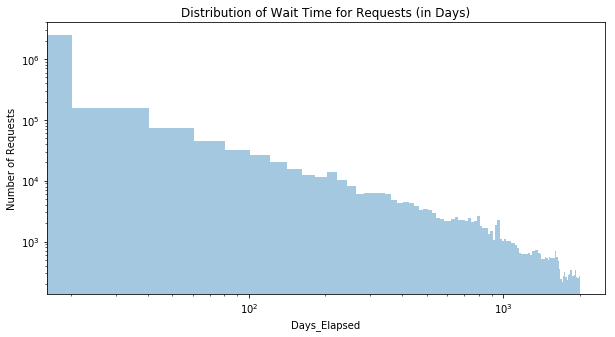

In [48]:
plt.figure(figsize = (10, 5))
sns.distplot(cases['Days_Elapsed'], bins = np.linspace(0, 2000, num = 100), kde = False)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Requests')
plt.title('Distribution of Wait Time for Requests (in Days)');

As shown above, only with **both the x-axis and the y-axis** on a log scale, does the trend start to become more linear. As we can see, the number of days waiting for requests are **unimodal and highly skewed to the right**, with most of the data close to below 100 days. 

While I can look at the distribution individually for all the individual feature in the 3 characteristics that I've investigated in the first 3 parts of the analysis, **I think looking at the median across will give a good intuition of how the wait time changes(since means are much more sensitive by outliers)**.

#### C. Days Elapsed v. Aggregated Request Categories

I will first look at the distribution of the medians of the wait time for all aggregated categories and compare those against my previous distribution of the statuses of the requests.

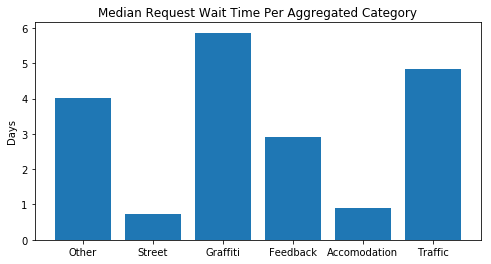

In [49]:
aggregated_groups = cases['Reaggregated'].unique()
medians = []
for group in aggregated_groups:
    medians.append(np.median(cases[cases['Reaggregated'] == group]['Days_Elapsed']))
plt.figure(figsize = (8, 4))
plt.bar(x = range(6), height = medians, tick_label = aggregated_groups)
plt.ylabel('Days')
plt.title('Median Request Wait Time Per Aggregated Category');

As shown above, Graffiti indeed takes the longest wait time to process as a service request, and accomodation is among one of the most efficient requests. However, Street-related requests take much shorter time than expected (with the stasues of the requests) to handle.

#### D. Days Elapsed v. Request Sources

Next, I will look at the distribution of the medians of the wait time for all requests broken down by their sources. 

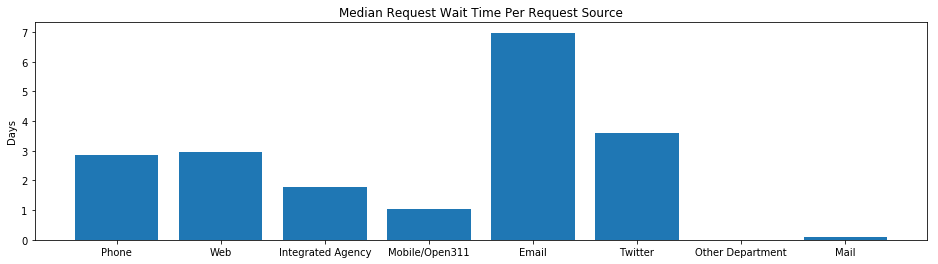

In [50]:
sources = cases['Source'].unique()
medians = []
for source in sources:
    medians.append(np.median(cases[cases['Source'] == source]['Days_Elapsed']))
plt.figure(figsize = (16, 4))
plt.bar(x = range(8), height = medians, tick_label = sources)
plt.ylabel('Days')
plt.title('Median Request Wait Time Per Request Source');

As shown above, Other Department and Mail categories have the shortest wait time, while Email actually took the longest to respond. This is quite a different trend from the distribution of statuses of requests (Emails have the least proportion of cases open). 

### 5. Conclusion

To summarize, for this analysis, I explored **the correlation between the statuses of requests and their characteristics**. 

The problem I aimed to address is **using the three characteristics of service requests to predict their statuses**:
* `Request Categories (Re-Aggregated)`
* `Request Sources`
* `Request Locations (Geographical Coordinates)`

The two main ML models I implemented were Random Forest Classifier (using `Request Categories` and `Request Sources` as the input) and K-Nearest Neighbor Classifier (using `Geographical Coordinates` as the input). 